In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from fbprophet import Prophet
import random

In [3]:
avocado_df = pd.read_csv('avocado.csv')
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
avocado_df.isnull().any()

Unnamed: 0      False
Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In [5]:
avocado_df = avocado_df.sort_values('Date')
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


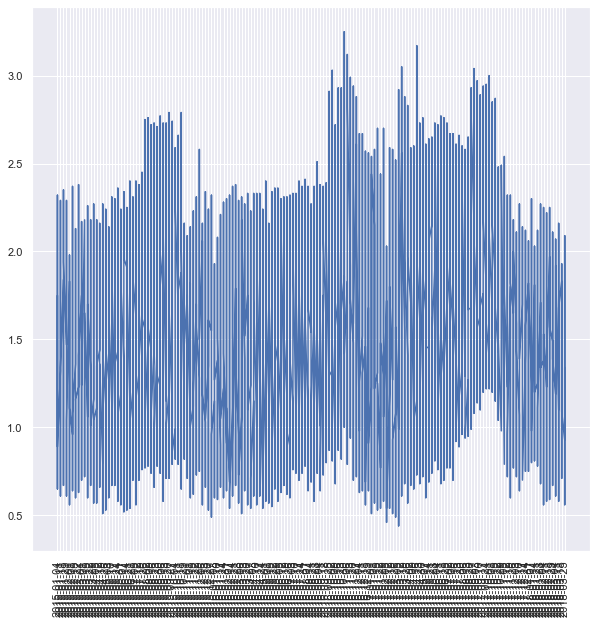

In [9]:
plt.figure(figsize=(10,10))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])
plt.xticks(rotation=90)
plt.show()

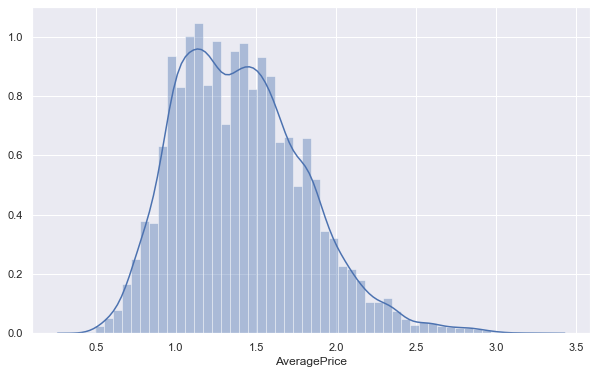

In [10]:
plt.figure(figsize=(10,6))
sns.distplot(avocado_df['AveragePrice'], color='b')
plt.show()

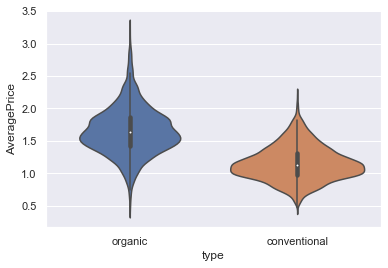

In [12]:
sns.violinplot(x='type', y='AveragePrice', data=avocado_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 <a list of 54 Text xticklabel objects>)

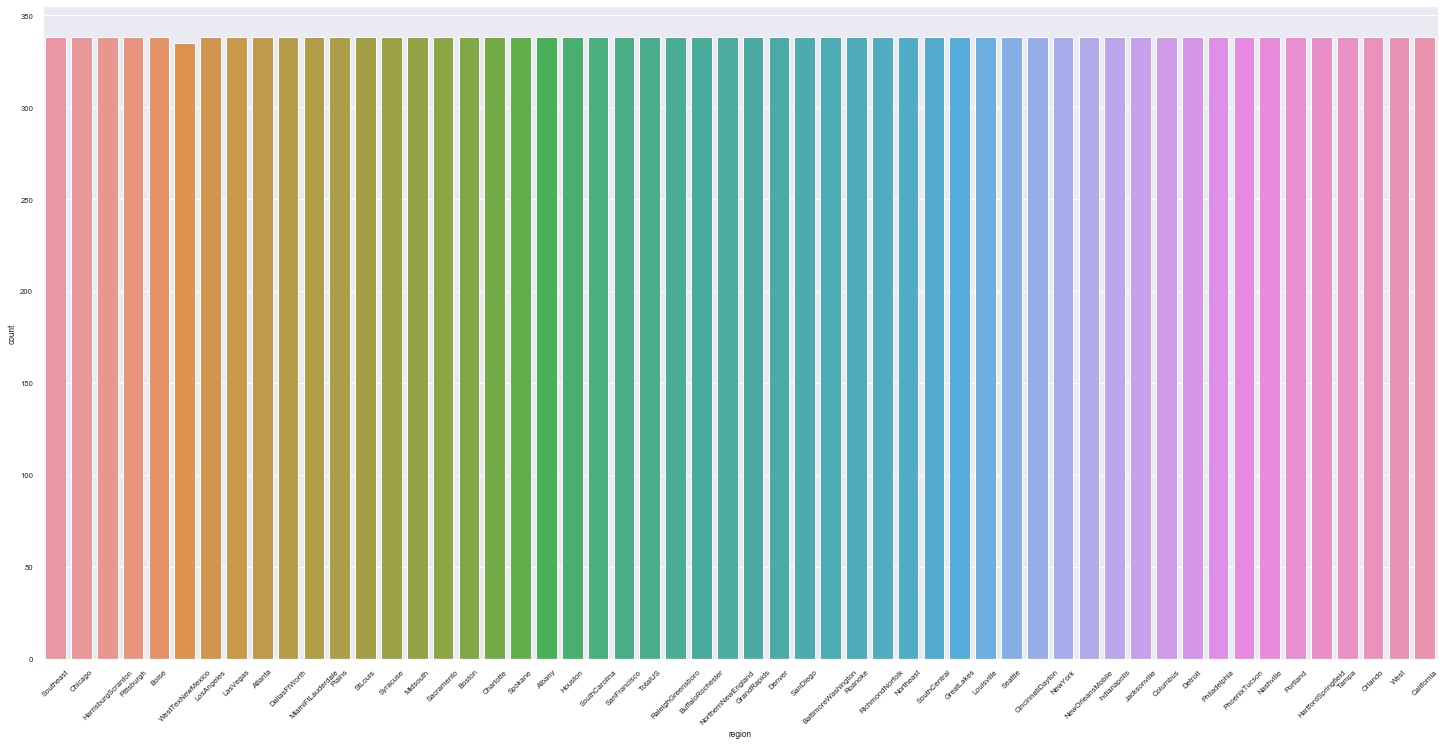

In [13]:
sns.set(font_scale=0.7)
plt.figure(figsize=[25,12])
sns.countplot(x='region', data=avocado_df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

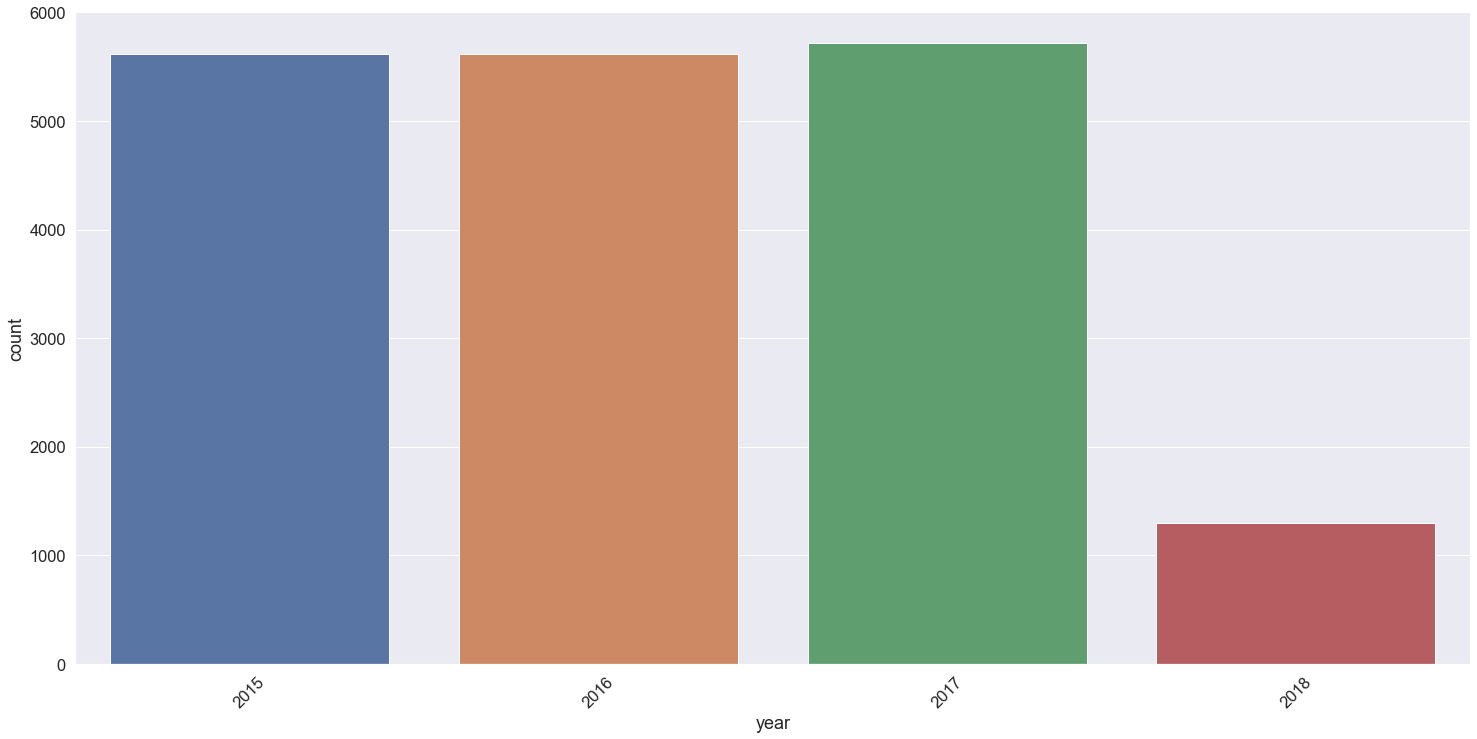

In [17]:
sns.set(font_scale=1.5)
plt.figure(figsize=[25,12])
sns.countplot(x='year', data=avocado_df)
plt.xticks(rotation=45)

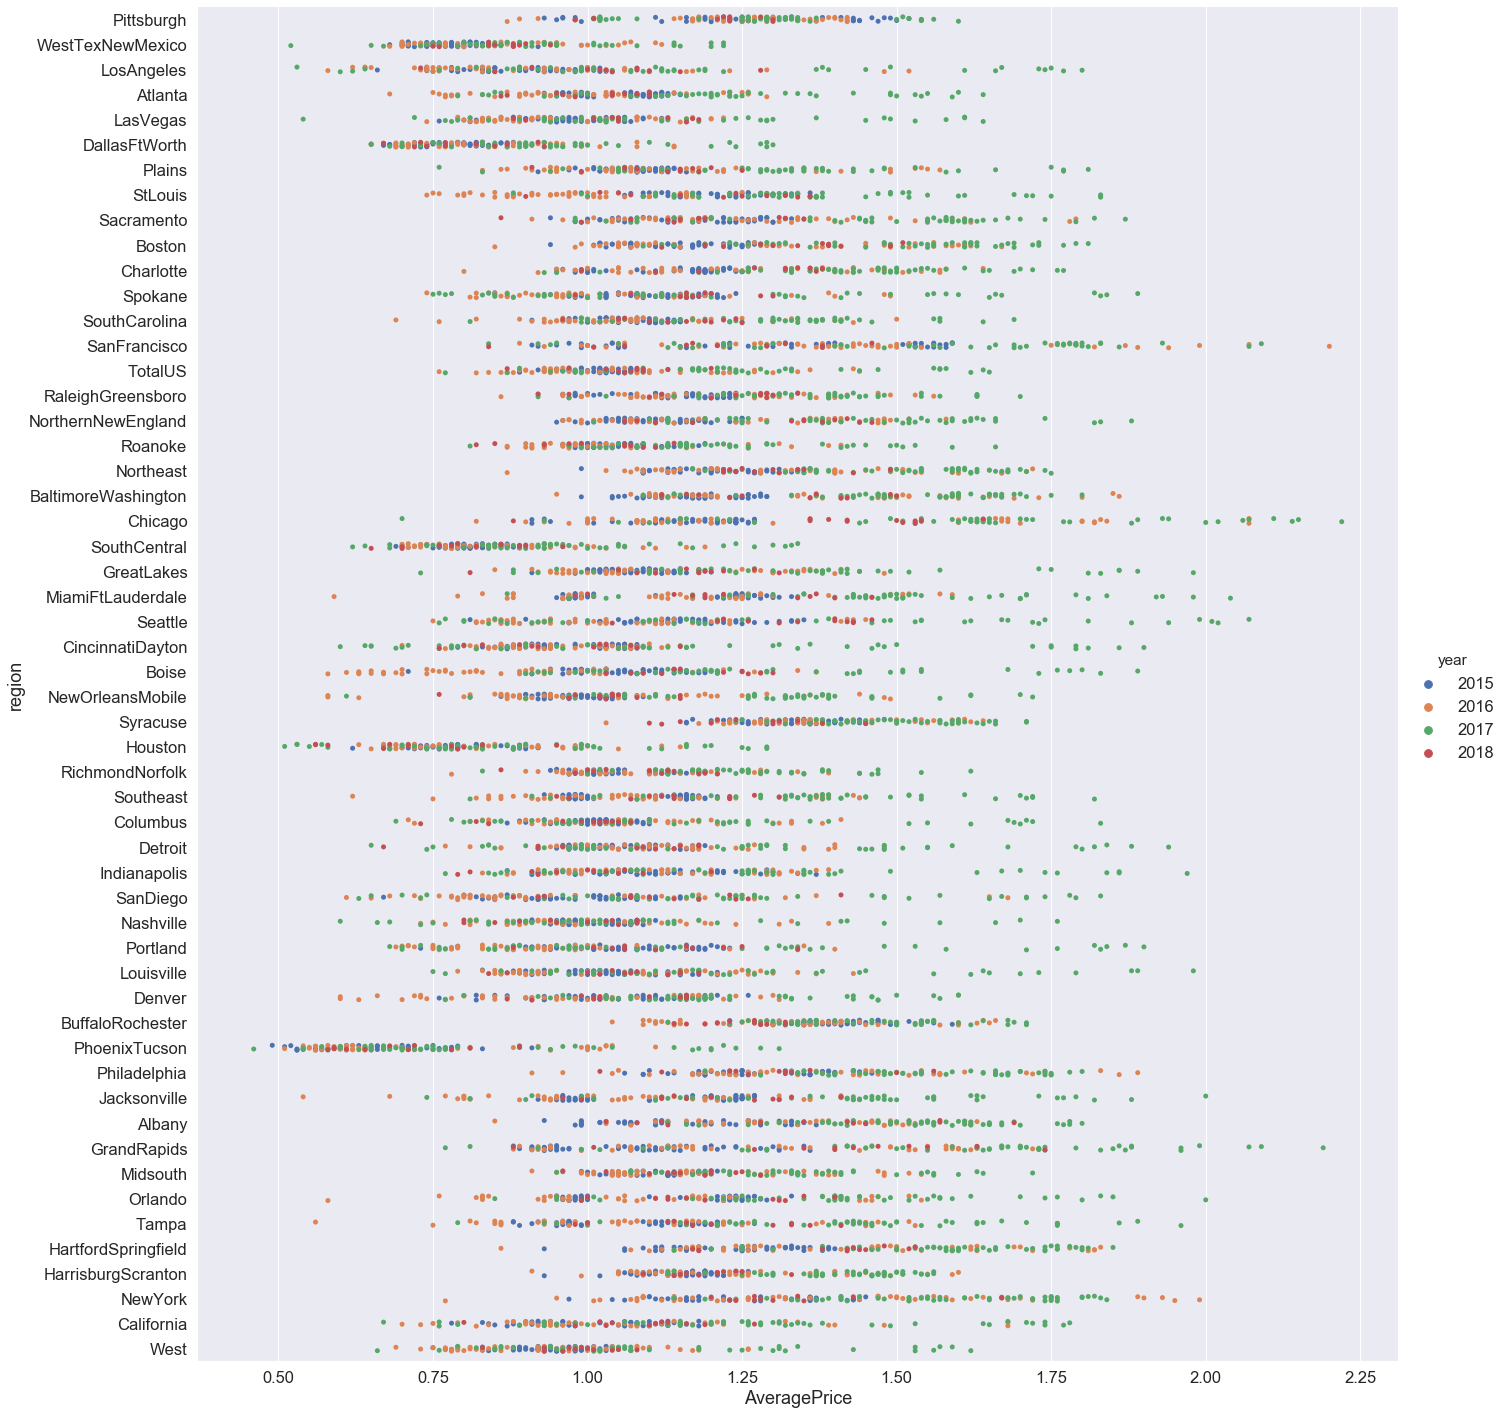

In [19]:
conventional = sns.catplot(x='AveragePrice', y='region', data = avocado_df[avocado_df['type']=='conventional'], hue='year', height=20)

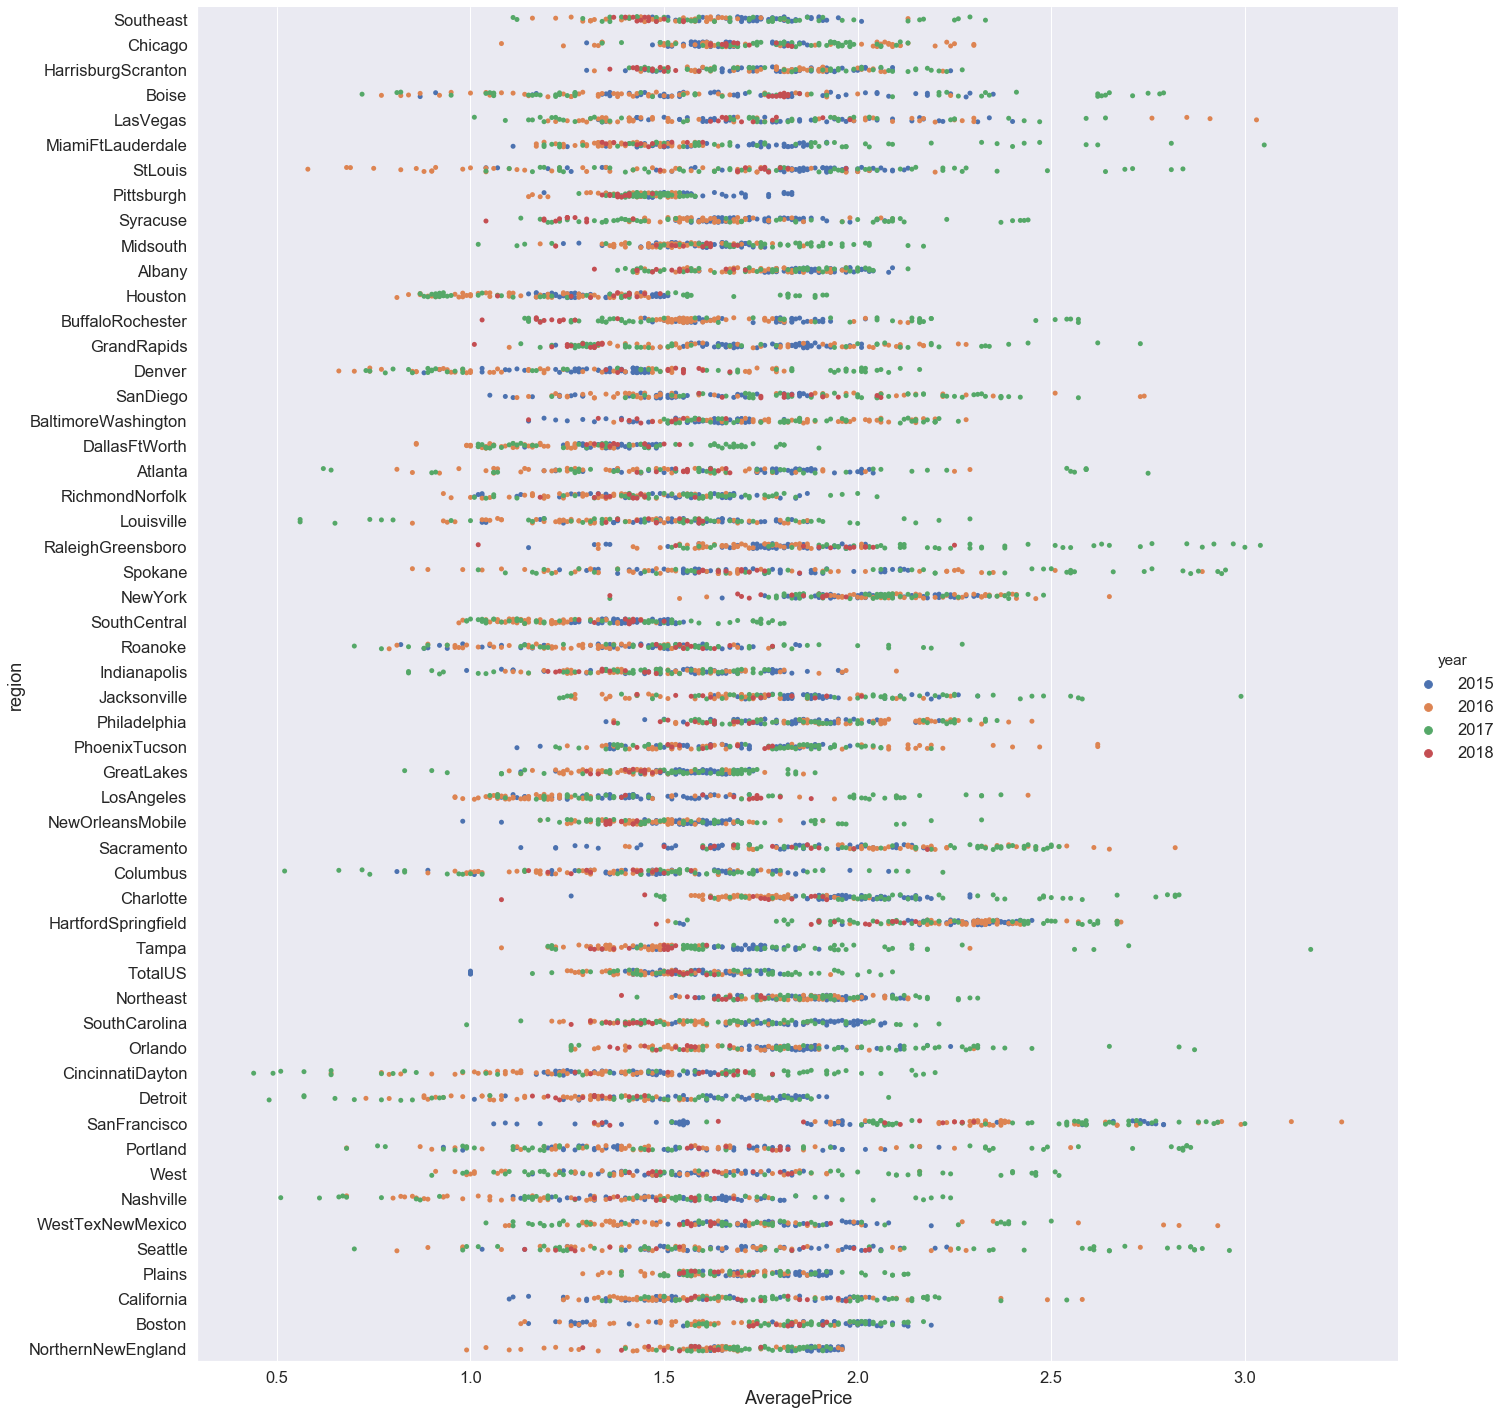

In [20]:
organic = sns.catplot(x='AveragePrice', y='region', data = avocado_df[avocado_df['type']=='organic'], hue='year', height=20)

In [21]:
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']]

In [22]:
avocado_prophet_df = avocado_prophet_df.rename(columns={'Date':'ds', 'AveragePrice':'y'})
avocado_prophet_df

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [23]:
#Training model
m = Prophet()
m.fit(avocado_prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
#Prediction
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [25]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.497917,0.884701,1.866976,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
1,2015-01-04,1.497917,0.864710,1.897043,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
2,2015-01-04,1.497917,0.856601,1.835231,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
3,2015-01-04,1.497917,0.922939,1.845136,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
4,2015-01-04,1.497917,0.882199,1.853537,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18609,2019-03-21,1.161737,0.540620,1.592101,0.979829,1.334214,-0.086289,-0.086289,-0.086289,-0.086289,-0.086289,-0.086289,0.0,0.0,0.0,1.075448
18610,2019-03-22,1.161007,0.562899,1.608894,0.978368,1.334123,-0.084622,-0.084622,-0.084622,-0.084622,-0.084622,-0.084622,0.0,0.0,0.0,1.076384
18611,2019-03-23,1.160276,0.533822,1.555089,0.976390,1.334388,-0.082682,-0.082682,-0.082682,-0.082682,-0.082682,-0.082682,0.0,0.0,0.0,1.077594
18612,2019-03-24,1.159545,0.598276,1.575458,0.974801,1.334168,-0.080489,-0.080489,-0.080489,-0.080489,-0.080489,-0.080489,0.0,0.0,0.0,1.079056


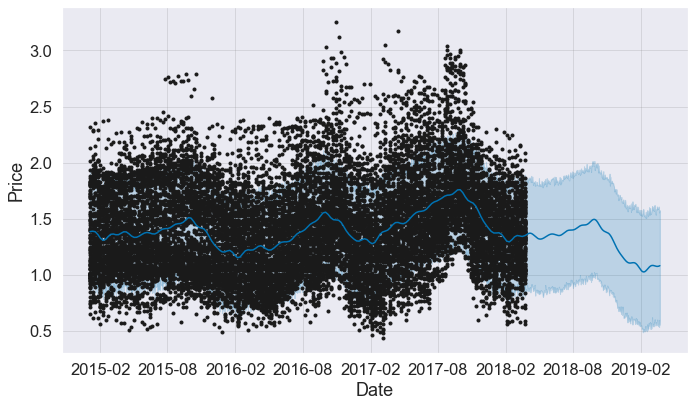

In [26]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

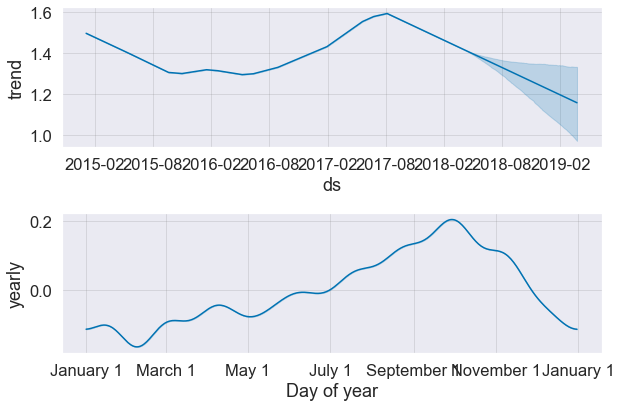

In [27]:
figure2 = m.plot_components(forecast)

In [28]:
avocado_df = pd.read_csv('avocado.csv')

In [29]:
avocado_df_sample = avocado_df[avocado_df['region']=='West']
avocado_df_sample = avocado_df_sample.sort_values('Date')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


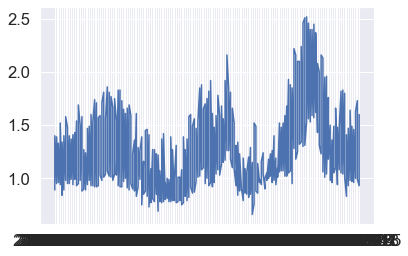

In [32]:
plt.plot(avocado_df_sample['Date'], avocado_df_sample['AveragePrice'])

In [35]:
avocado_sample_prophet = avocado_df_sample[['Date', 'AveragePrice']]
avocado_sample_prophet = avocado_sample_prophet.rename(columns={'Date':'ds', 'AveragePrice':'y'})
avocado_sample_prophet

,ds,y
2755,2015-01-04,0.89
11881,2015-01-04,1.40
2754,2015-01-11,0.95
11880,2015-01-11,1.39
2753,2015-01-18,0.96
...,...,...
18227,2018-03-11,1.63
18226,2018-03-18,1.73
9103,2018-03-18,0.99
9102,2018-03-25,0.93


In [36]:
m = Prophet()
m.fit(avocado_sample_prophet)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


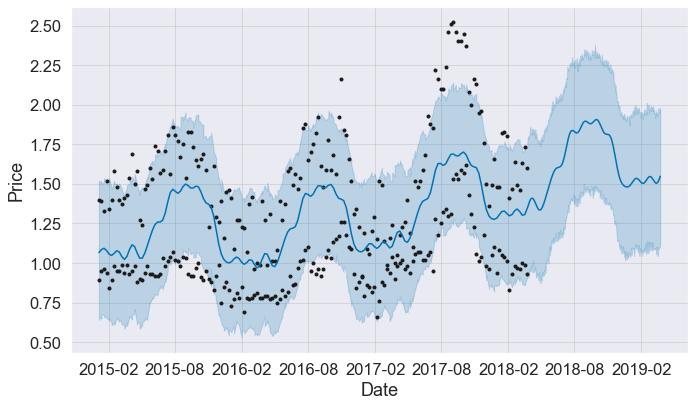

In [37]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

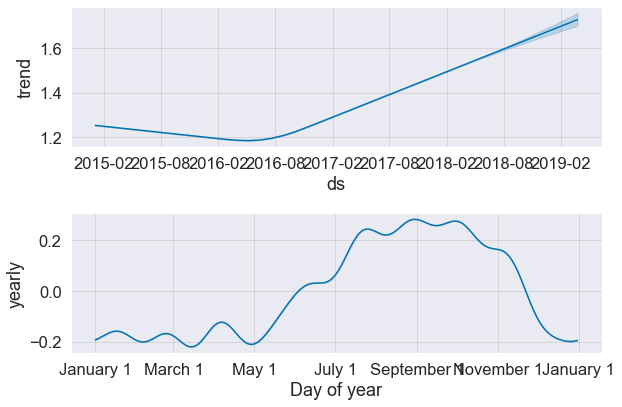

In [38]:
figure3 = m.plot_components(forecast)